In [1]:
import map
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import numpy as np
import globalvar as gv
import astar
import astarclass
import smoothpath
import pickle


14 10 10
[(10, 0), (10, 1), (9, 2), (8, 3), (7, 4), (6, 5), (5, 6), (5, 7), (6, 8), (7, 9), (7, 10), (6, 11), (5, 11), (4, 11), (3, 11), (2, 12), (1, 13), (0, 14)]


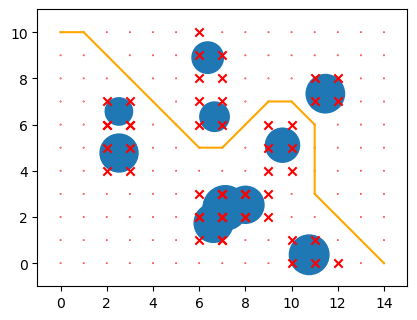

finished!
[<map.Obstacle object at 0x000002350A7733D0>, <map.Obstacle object at 0x000002350EBFA9E0>, <map.Obstacle object at 0x000002350EC25180>, <map.Obstacle object at 0x000002350EC24280>, <map.Obstacle object at 0x000002350EC242E0>, <map.Obstacle object at 0x000002350EC241C0>, <map.Obstacle object at 0x000002350EC251E0>, <map.Obstacle object at 0x000002350EC25240>, <map.Obstacle object at 0x000002350EC252A0>, <map.Obstacle object at 0x000002350EC25300>]


In [3]:

gv.obstacle_number = 10
gv.obstacle_safedist = 0.5
gv.obstacle_radius = [0.5,1]
gv.length_start = 2 * gv.obstacle_radius[1]
gv.length = 10 + 2 * gv.length_start
gv.width = 10
gv.smooth_poly_n = 5
gv.sim_step_length = 10

jupyter_figsize = 0.3

fig, axes = plt.subplots()
myobstacle = map.generate(axes) # class Obstacle
mymap = np.zeros((gv.width + 1, gv.length + 1))


mymap = astar.astarmapinit(mymap, myobstacle,axes)
#print(mymap)
axes.set_aspect(1)
axes.set(xlim=(-1, gv.length + 1),ylim=(-1, gv.width + 1))
plt.rcParams['figure.figsize'] = ((gv.length + 2)*jupyter_figsize, (gv.width + 2)*jupyter_figsize)


# plt.show()

astarmap = astarclass.AstarMap(mymap,0,0,gv.width,gv.length)
result, solution_flag = astar.start(astarmap) #逆序

result.reverse()
result_plot = [(gv.width - x, y) for x,y in result]
print(result_plot)
x_coord = [coord[0] for coord in result_plot]
y_coord = [coord[1] for coord in result_plot]
axes.plot(y_coord,x_coord,'orange')
# figure setup
plt.show()
fig
print('finished!')
print(myobstacle)



In [4]:

optimized_coeffs, filter_line_coord = smoothpath.start(result)

print(optimized_coeffs)


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.07106781e-01 -7.07106781e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  7.07106781e-01  2.92893219e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.07106781e-01 -7.07106781e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  7.07106781e-01  2.92893219e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.07106781e-01 -7.07106781e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  7.07106781e-01  2.92893219e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.07106781e-01 -7.07106781e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  7.07106781e-01  2.92893219e-01
   0.00000

[[ 0.          0.          0.        ]
 [ 0.          1.          1.        ]
 [ 1.          2.          2.41421356]
 [ 2.          3.          3.82842712]
 [ 3.          4.          5.24264069]
 [ 4.          5.          6.65685425]
 [ 5.          6.          8.07106781]
 [ 5.          7.          9.07106781]
 [ 4.          8.         10.48528137]
 [ 3.          9.         11.89949494]
 [ 3.         10.         12.89949494]
 [ 4.         11.         14.3137085 ]
 [ 5.         11.         15.3137085 ]
 [ 6.         11.         16.3137085 ]
 [ 7.         11.         17.3137085 ]
 [ 8.         12.         18.72792206]
 [ 9.         13.         20.14213562]
 [10.         14.         21.55634919]]


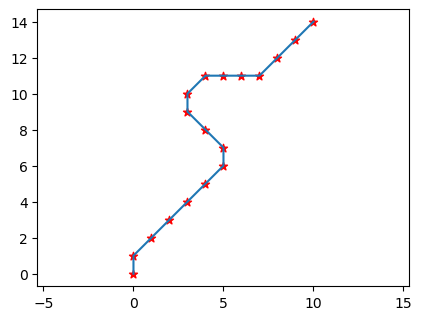

In [5]:
print(filter_line_coord)
plt.plot(filter_line_coord[:, 0], filter_line_coord[:, 1], label='Initial')
plt.scatter(filter_line_coord[:, 0], filter_line_coord[:, 1], marker='*',c = 'r')
plt.axis('equal')
plt.show()

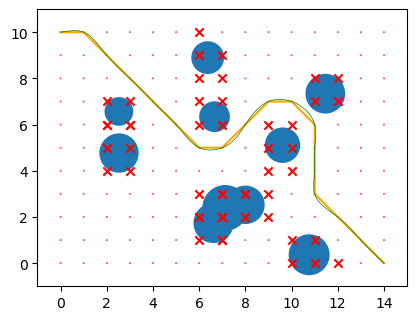

In [6]:
# axes.cla()

line_number = len(filter_line_coord) - 1
coeffs = np.reshape(optimized_coeffs, (line_number * 2, gv.smooth_poly_n + 1))
coord = np.array(filter_line_coord)

for j in range(line_number):
    i = j * 2
    a_x = coeffs[i]
    a_y = coeffs[i + 1]
    t = np.linspace(coord[j][2], coord[j+1][2], 100)
    x = np.polyval(a_x, t)
    y = np.polyval(a_y, t) 
    # print(x,y)
    axes.plot(y, gv.width - x, color = 'green', linewidth = 0.5)
    
fig



In [7]:
for i in range(len(myobstacle)):
    temp = myobstacle[i].y
    myobstacle[i].y = myobstacle[i].x
    myobstacle[i].x = gv.width - temp
    # print(myobstacle[i].x,myobstacle[i].y,myobstacle[i].r)

In [8]:
data = {'pathcoeffs':optimized_coeffs,'pathpoint':filter_line_coord,'obstacle':myobstacle}
f = open('savedata.pkl','wb')
pickle.dump(data,f)
f.close()
f2 = open('savedata.pkl','rb')
testdata = pickle.load(f2)

print(testdata['pathcoeffs'])
f.close()

[-1.04178747e-01  2.33890151e-01  1.44924170e-02  1.88504513e-02
 -1.63054272e-01 -2.62408381e-17  6.35348734e-02 -1.06721434e-01
 -5.16510890e-02  2.60458690e-03  1.09223306e+00  2.47678834e-18
  2.86846845e-02 -2.42448418e-01  6.53048743e-01 -3.67421430e-01
 -6.51423706e-02 -6.72120902e-03 -1.24287714e-02  9.92129810e-02
 -2.51967650e-01  1.27584228e-01  9.99304027e-01  3.82951850e-02
  1.30481108e-03 -5.25336478e-03 -3.55305051e-02  1.77506700e-01
  6.43911576e-01 -1.01772344e+00  4.40193992e-05 -3.22183240e-03
  2.79700413e-02 -7.27556711e-02  7.18771538e-01  4.01052117e-01
 -7.91877476e-04  9.94112383e-03 -3.32400635e-02 -8.51156921e-03
  8.09187899e-01 -5.92291942e-01  1.20737594e-04 -1.02949979e-03
 -1.10413991e-03  2.53246348e-02  6.71717939e-01  2.41015333e-01
  5.93479372e-04 -9.66666493e-03  4.79864172e-02 -4.87180244e-02
  6.01964113e-01 -7.79362977e-01 -2.42685641e-04  3.71196084e-03
 -1.63896543e-02  7.48809669e-03  7.58950850e-01  3.33946841e-01
 -1.59184003e-03  3.23686